In [1]:
#Downloading datasets from kaggle

!kaggle datasets download cnic92/200-financial-indicators-of-us-stocks-20142018

100%|██████████████████████████████████████| 14.8M/14.8M [00:11<00:00, 1.30MB/s]
100%|██████████████████████████████████████| 14.8M/14.8M [00:11<00:00, 1.30MB/s]


In [3]:
#Unzipping dataset
!unzip 200-financial-indicators-of-us-stocks-20142018.zip

Archive:  200-financial-indicators-of-us-stocks-20142018.zip
  inflating: 2014_Financial_Data.csv  
  inflating: 2015_Financial_Data.csv  
  inflating: 2016_Financial_Data.csv  
  inflating: 2017_Financial_Data.csv  
  inflating: 2018_Financial_Data.csv  


In [5]:
#importing neccesary libraries
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import numpy as np
import pandas as pd

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

In [8]:
#Checking the shape of all the datasets 
df_2014 = pd.read_csv('2014_Financial_Data.csv')
df_2015 = pd.read_csv('2015_Financial_Data.csv')
df_2016 = pd.read_csv('2016_Financial_Data.csv')
df_2017 = pd.read_csv('2017_Financial_Data.csv')
df_2018 = pd.read_csv('2018_Financial_Data.csv')

In [9]:
print('Shape of data for year 2014 is {}'.format(df_2014.shape))
print('Shape of data for year 2015 is {}'.format(df_2015.shape))
print('Shape of data for year 2015 is {}'.format(df_2016.shape))
print('Shape of data for year 2015 is {}'.format(df_2017.shape))
print('Shape of data for year 2015 is {}'.format(df_2018.shape))

Shape of data for year 2014 is (3808, 225)
Shape of data for year 2015 is (4120, 225)
Shape of data for year 2015 is (4797, 225)
Shape of data for year 2015 is (4960, 225)
Shape of data for year 2015 is (4392, 225)


In [11]:
#All datasets have equal features of 225 so we can explore one dataset
df_2014.head()

,Unnamed: 0,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2015 PRICE VAR [%],Class
0,PG,7.440100e+10,-0.0713,3.903000e+10,3.537100e+10,0.000000e+00,2.146100e+10,2.146100e+10,1.391000e+10,7.090000e+08,...,-0.0187,-0.0217,0.0359,0.0316,0.1228,0.0000,-0.1746,Consumer Defensive,-9.323276,0
1,VIPS,3.734148e+09,1.1737,2.805625e+09,9.285226e+08,1.083303e+08,3.441414e+08,7.939267e+08,1.345959e+08,1.214869e+07,...,NaN,NaN,NaN,NaN,NaN,1.6484,1.7313,Consumer Defensive,-25.512193,0
2,KR,9.837500e+10,0.0182,7.813800e+10,2.023700e+10,0.000000e+00,1.519600e+10,1.751200e+10,2.725000e+09,4.430000e+08,...,0.0618,0.0981,0.1886,0.3268,0.2738,0.0000,0.0234,Consumer Defensive,33.118297,1
3,RAD,2.552641e+10,0.0053,1.820268e+10,7.323734e+09,0.000000e+00,6.561162e+09,6.586482e+09,7.372520e+08,4.245910e+08,...,0.0211,-0.0510,-0.0189,0.1963,-0.0458,0.0000,-0.0060,Consumer Defensive,2.752291,1
4,GIS,1.790960e+10,0.0076,1.153980e+10,6.369800e+09,0.000000e+00,3.474300e+09,3.412400e+09,2.957400e+09,3.024000e+08,...,0.0257,0.0090,0.0215,0.0274,0.1025,0.0000,-0.0220,Consumer Defensive,12.897715,1


In [15]:
df_2014.dtypes

Unnamed: 0               object
Revenue                 float64
Revenue Growth          float64
Cost of Revenue         float64
Gross Profit            float64
                         ...   
R&D Expense Growth      float64
SG&A Expenses Growth    float64
Sector                   object
2015 PRICE VAR [%]      float64
Class                     int64
Length: 225, dtype: object

In [16]:
#select columns which are non-numeric
df_objects = df_2014.select_dtypes(include=['object'])
df_objects

,Unnamed: 0,Sector
0,PG,Consumer Defensive
1,VIPS,Consumer Defensive
2,KR,Consumer Defensive
3,RAD,Consumer Defensive
4,GIS,Consumer Defensive
...,...,...
3803,TSRI,Technology
3804,TZOO,Technology
3805,USATP,Technology
3806,WSTG,Technology


In [17]:
df_2014.isnull().sum()

Unnamed: 0                0
Revenue                  44
Revenue Growth          236
Cost of Revenue          74
Gross Profit             52
                       ... 
R&D Expense Growth      247
SG&A Expenses Growth    243
Sector                    0
2015 PRICE VAR [%]        0
Class                     0
Length: 225, dtype: int64

In [32]:
#Null values, datatypes and percentage 
data_info = pd.DataFrame(df_2014.dtypes).T.rename(index={0:'column Type'})
df_null_values = pd.DataFrame(df_2014.isnull().sum()).T.rename(index={0:'Null values (nb)'})
df_percent_null_value = pd.DataFrame(df_2014.isnull().sum()/df_2014.shape[0]*100).T.rename(index={0:'null values (%)'})
data_info = pd.concat([data_info,df_null_values,df_percent_null_value], axis=0)
data_info

,Unnamed: 0,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2015 PRICE VAR [%],Class
column Type,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,object,float64,int64
Null values (nb),0,44,236,74,52,136,59,63,55,63,...,290,290,290,369,302,247,243,0,0,0
null values (%),0.0,1.155462,6.197479,1.943277,1.365546,3.571429,1.54937,1.654412,1.444328,1.654412,...,7.615546,7.615546,7.615546,9.690126,7.930672,6.486345,6.381303,0.0,0.0,0.0


In [60]:
df_all = pd.concat([df_2014, df_2015, df_2016, df_2017, df_2018], axis=0)


df_columns_to_drop = ['Unnamed: 0','Sector', 'Class','2015 PRICE VAR [%]','2016 PRICE VAR [%]','2017 PRICE VAR [%]','2018 PRICE VAR [%]', '2019 PRICE VAR [%]']



df_all = df_all.drop(df_columns_to_drop, axis=1)
df_all.fillna(0, inplace=True)
df_all.head()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,10Y Dividend per Share Growth (per Share),5Y Dividend per Share Growth (per Share),3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth
0,7.440100e+10,-0.0713,3.903000e+10,3.537100e+10,0.000000e+00,2.146100e+10,2.146100e+10,1.391000e+10,7.090000e+08,1.449400e+10,...,0.1013,0.0834,0.0751,-0.0187,-0.0217,0.0359,0.0316,0.1228,0.0000,-0.1746
1,3.734148e+09,1.1737,2.805625e+09,9.285226e+08,1.083303e+08,3.441414e+08,7.939267e+08,1.345959e+08,1.214869e+07,1.753823e+08,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.6484,1.7313
2,9.837500e+10,0.0182,7.813800e+10,2.023700e+10,0.000000e+00,1.519600e+10,1.751200e+10,2.725000e+09,4.430000e+08,2.270000e+09,...,0.0000,0.1215,0.1633,0.0618,0.0981,0.1886,0.3268,0.2738,0.0000,0.0234
3,2.552641e+10,0.0053,1.820268e+10,7.323734e+09,0.000000e+00,6.561162e+09,6.586482e+09,7.372520e+08,4.245910e+08,2.502180e+08,...,0.0000,0.0000,0.0000,0.0211,-0.0510,-0.0189,0.1963,-0.0458,0.0000,-0.0060
4,1.790960e+10,0.0076,1.153980e+10,6.369800e+09,0.000000e+00,3.474300e+09,3.412400e+09,2.957400e+09,3.024000e+08,2.707700e+09,...,0.1092,0.1250,0.1144,0.0257,0.0090,0.0215,0.0274,0.1025,0.0000,-0.0220


In [105]:
#Scaling the data to make all atributes comparable
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_all)

#Normalizaing the data with mean=0 & standard Deviation of 1, so that data is follows a normal distribution

df_normalized = normalize(df_scaled)

In [121]:
#Dimensionality reduction
pca = PCA(n_components=2)
df_principal = pca.fit_transform(df_normalized)
df_principal = pd.DataFrame(df_principal)
df_principal.columns = ['P1','P2']
print(df_principal.head())

         P1        P2
0  0.483229  0.259974
1 -0.343904 -0.446622
2  0.578814  0.226945
3  0.312707 -0.058945
4  0.791283  0.138652


In [122]:
#Numpy array of all the cluster labels assigned to each data point
db_default = DBSCAN(eps=0.0375, min_samples=3).fit(df_principal)
labels = db_default.labels_

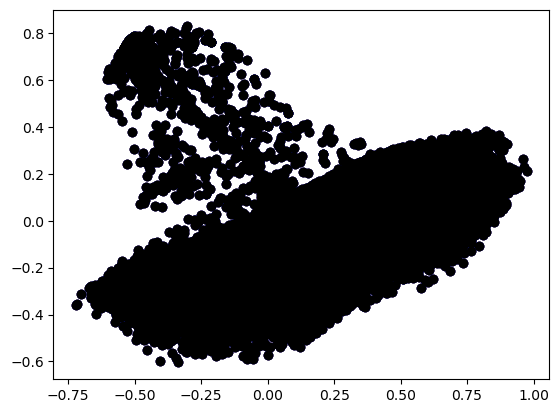

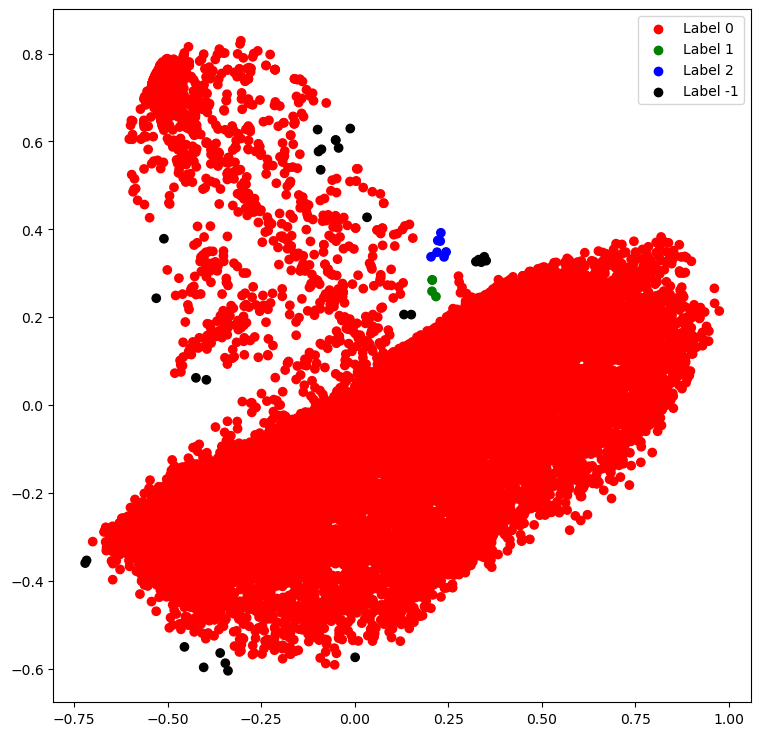

In [123]:
#Building the label to clor color mapping

colours = {}
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[3] = 'k'

#Building the color vector for each data point

cvec = [colours.get(label, 'k')  for label in labels]

#For the construction of the legend of the plot
r = plt.scatter(df_principal['P1'], df_principal['P2'], c='r')
g = plt.scatter(df_principal['P1'], df_principal['P2'], c='g')
b = plt.scatter(df_principal['P1'], df_principal['P2'], c='b')
k = plt.scatter(df_principal['P1'], df_principal['P2'], c='k')


# Plotting P1 on the X-Axis and P2 on the Y-Axis 
# according to the colour vector defined
plt.figure(figsize =(9, 9))
plt.scatter(df_principal['P1'], df_principal['P2'], c = cvec)
  
# Building the legend
plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1'))
  
plt.show()

In [129]:
#Tuning the Parameters of the Model
db = DBSCAN(eps= 0.0375, min_samples=15).fit(df_principal)

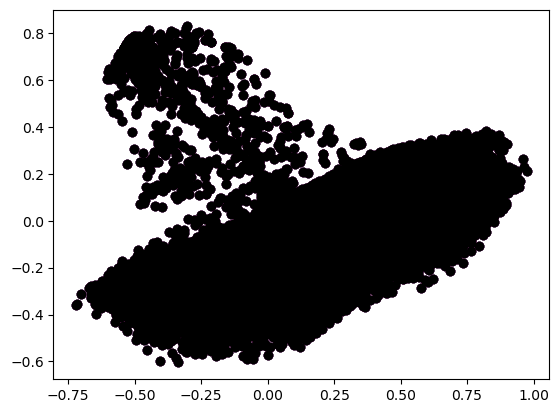

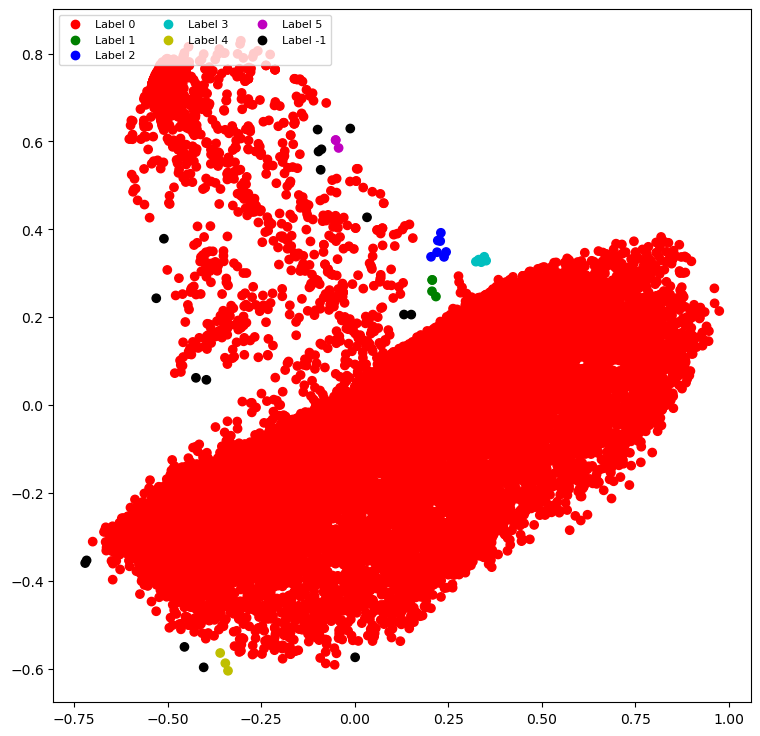

In [130]:
#visualizing changes
colours1 = {}
colours1[0] = 'r'
colours1[1] = 'g'
colours1[2] = 'b'
colours1[3] = 'c'
colours1[4] = 'y'
colours1[5] = 'm'
colours1[-1] = 'k'

cvec = [colours1[label] for label in labels]
colors = ['r', 'g', 'b', 'c', 'y', 'm', 'k' ]

r = plt.scatter(
        df_principal['P1'], df_principal['P2'], marker ='o', color = colors[0])
g = plt.scatter(
        df_principal['P1'], df_principal['P2'], marker ='o', color = colors[1])
b = plt.scatter(
        df_principal['P1'], df_principal['P2'], marker ='o', color = colors[2])
c = plt.scatter(
        df_principal['P1'], df_principal['P2'], marker ='o', color = colors[3])
y = plt.scatter(
        df_principal['P1'], df_principal['P2'], marker ='o', color = colors[4])
m = plt.scatter(
        df_principal['P1'], df_principal['P2'], marker ='o', color = colors[5])
k = plt.scatter(
        df_principal['P1'], df_principal['P2'], marker ='o', color = colors[6])
  
plt.figure(figsize =(9, 9))
plt.scatter(df_principal['P1'], df_principal['P2'], c = cvec)
plt.legend((r, g, b, c, y, m, k),
           ('Label 0', 'Label 1', 'Label 2', 'Label 3', 'Label 4',
            'Label 5', 'Label -1'),
           scatterpoints = 1,
           loc ='upper left',
           ncol = 3,
           fontsize = 8)
plt.show()